# Harry Potter and the Philosopher's Stone 

## A statistical and literary analysis

### Initialization:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import PunktSentenceTokenizer
sns.set_style("whitegrid")
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')

In [2]:
book1 = open('book_1.txt').read()
book2 = open('book_2.txt').read()

In [3]:
book1 = book1.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '').replace('“', '"').replace('”', '"').replace('—', '-').replace('…', '...').replace("\'", "'")
book2 = book2.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '').replace('“', '"').replace('”', '"').replace('—', '-').replace('…', '...').replace("\'", "'")


In [4]:
class Chapter:
    def __init__(self, number, title, body):
        self.number = number
        self.title = title
        self.body = body
        wc = 0
        for sent in self.body:
            wc += len(sent.split(' '))
        self.wc = wc

In [5]:
class Book:
    def __init__(self, title, author, chapters, text, body):
        self.title = title
        self.author = author
        self.chapters = chapters
        self.chapter_names = []
        self.num_chapters = len(self.chapters)
        for i in range(self.num_chapters):
            self.chapter_names.append(self.chapters[i].title)
        self.wc = 0
        for i in range(self.num_chapters):
            self.wc += self.chapters[i].wc
        self.text = text
        self.body = body
            
    ## flag: t-title, b-body, w-wc, c-chapter, plain-plain body text
    def get(self, num, flag='c'):
        if flag == 't':
            return self.chapters[num-1].title
        elif flag == 'b':
            return self.chapters[num-1].body
        elif flag == 'w':
            return self.chapters[num-1].wc
        elif flag == 'c':
            return self.chapters[num-1]
        elif flag == 'plain':
            return ' '.join(self.chapters[num-1].body)
        else:
            print("Check flag parameter")

In [6]:
def book_creator(text):
    tmp = text.split('\n')
    sents = [s for s in tmp if s != '']
    title = sents[0]
    author = sents[2]
    sents = sents[sents.index('Chapter 1'):]
    
    indicies = []
    chapters = []
    body = []
    
    for i in range(len(sents)):
        if re.findall("Chapter", sents[i]):
            indicies.append(i)
    
    for i in range(len(indicies)):
        ch_number = int(''.join(list(filter(str.isdigit, sents[indicies[i]]))))
        ch_title = sents[indicies[i]+1]
        if i != len(indicies) - 1:
            ch_body = sents[indicies[i]+2:indicies[i+1]]
        else:
            ch_body = sents[indicies[i]+2:]
                
        chapters.append(Chapter(ch_number, ch_title, ch_body))
        body += ch_body
                
    return Book(title, author, chapters, sents, body)

In [7]:
HP = book_creator(book1)

### Word Count 

In [8]:
wc_list = []
for i in range(HP.num_chapters):
    wc_list.append(HP.get(i, 'w'))
    
print(wc_list)

[5604, 4664, 3474, 3893, 3772, 6668, 6356, 4517, 3064, 4975, 4317, 3394, 5548, 3222, 3511, 5146, 6537]


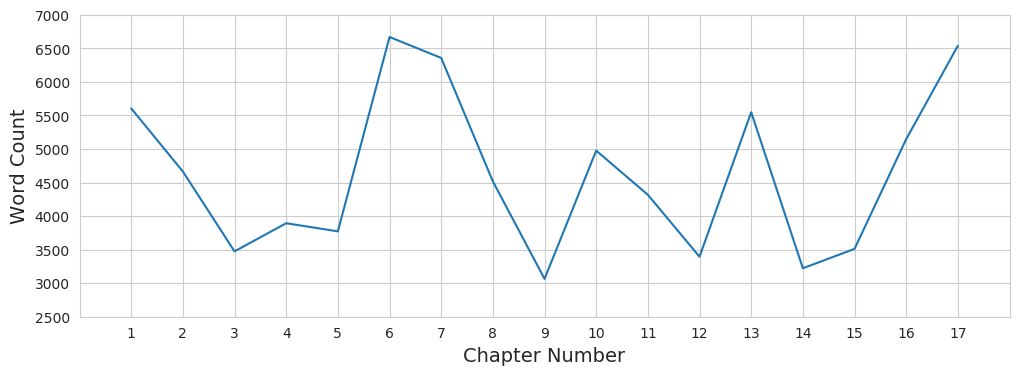

In [9]:
ax = plt.subplots(figsize=(12,4),dpi=100)
ax = sns.lineplot(x=list(range(1, (HP.num_chapters + 1))), y=wc_list)
ax.set_ylim(2500, 7000)
ax.set_xlim(0, 18)
ax.set_xlabel("Chapter Number", fontsize=14)
ax.set_ylabel("Word Count", fontsize=14)
_ = ax.set_xticks(list(range(1, (HP.num_chapters + 1))))

### Sentence Length 

In [10]:
sent_len_list = []
for i in range(1, (HP.num_chapters + 1)):
    sum = 0
    body = HP.get(i, 'b')
    for s in body:
        sum += len(s.split(' '))
    sent_len_list.append(sum/len(body))

print(sent_len_list)
    

[42.4, 34.74, 29.270676691729324, 24.65359477124183, 22.835616438356166, 22.146341463414632, 24.155080213903744, 33.30434782608695, 23.578199052132703, 26.323170731707318, 24.773722627737225, 26.932038834951456, 25.983870967741936, 25.258992805755394, 27.372340425531913, 20.428125, 24.471615720524017]


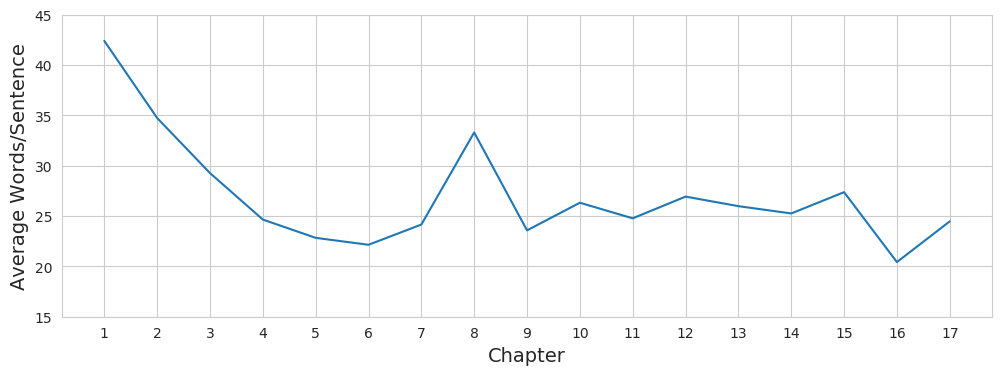

In [11]:
ax = plt.subplots(figsize=(12,4),dpi=100)
ax = sns.lineplot(x=list(range(1, (HP.num_chapters + 1))), y=sent_len_list)
ax.set_ylim(15, 45)
#ax.set_xlim(0, 18)
ax.set_xlabel("Chapter", fontsize=14)
ax.set_ylabel("Average Words/Sentence", fontsize=14)
_ = ax.set_xticks(list(range(1, (HP.num_chapters + 1))))

### Character name count

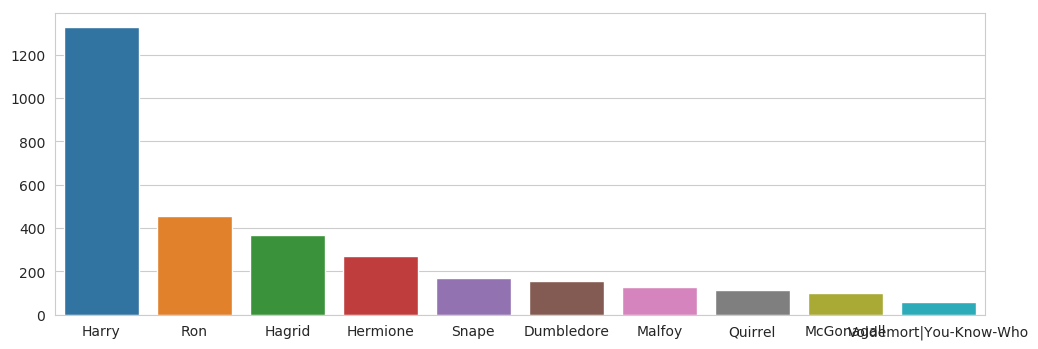

In [19]:
mains = ["Harry", "Ron", "Hagrid", "Hermione", "Snape", "Dumbledore", "Malfoy", "Quirrel", "McGonagall", "Voldemort|You-Know-Who"]
mains_count = [len(re.findall(m, book1)) for m in mains]

ax = plt.subplots(figsize=(12,4),dpi=100)
ax = sns.barplot(x=mains, y=mains_count)

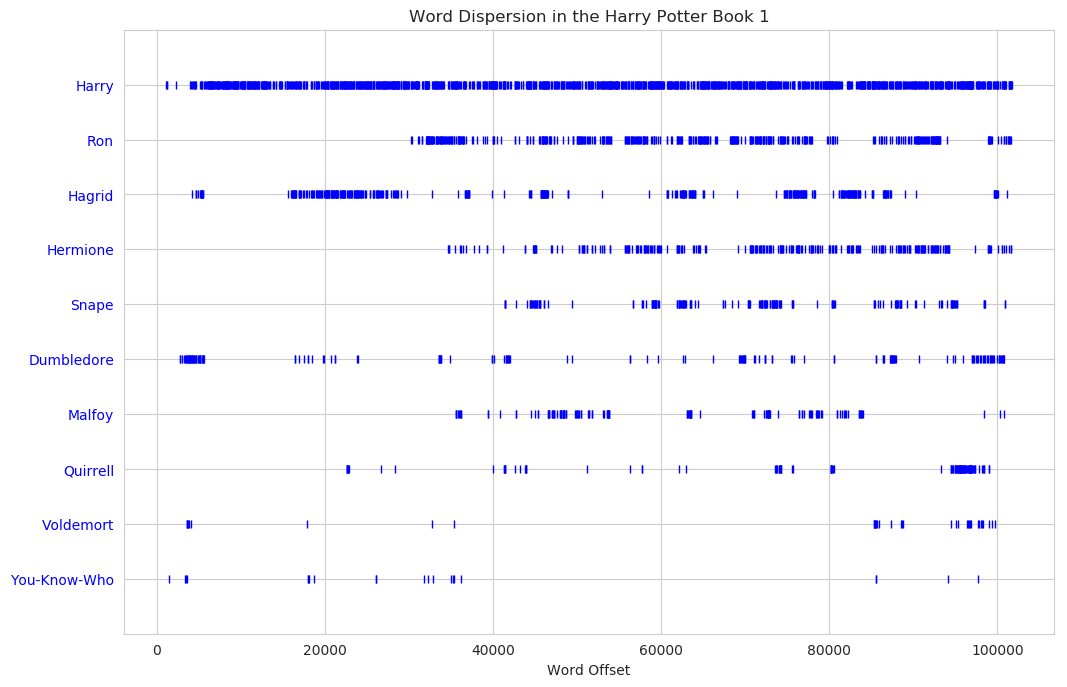

In [14]:
tokens = nltk.word_tokenize(' '.join(HP.body))
mytext = nltk.Text(tokens)

words = ["Harry", "Ron", "Hagrid", "Hermione", "Snape", "Dumbledore", "Malfoy", "Quirrell", "Voldemort", "You-Know-Who"]
plt.subplots(figsize=(12,8),dpi=100)
nltk.draw.dispersion.dispersion_plot(
    mytext, words, ignore_case=False,
    title='Word Dispersion in the Harry Potter Book 1'
)

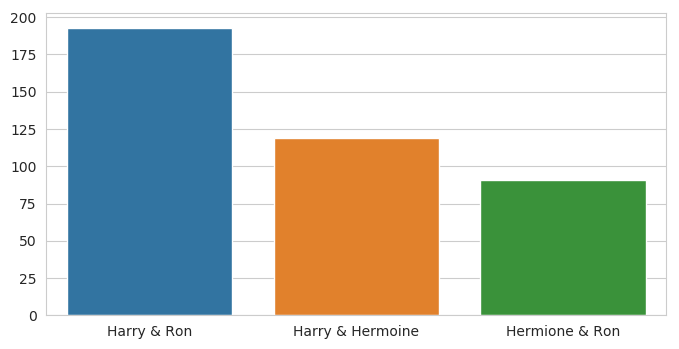

In [38]:
body = '\n'.join(HP.body)
mains = ["Harry.*Ron|Ron.*Harry", "Harry.*Hermione|Hermione.*Harry", "Hermione.*Ron|Ron.*Hermione"]
labels = ['Harry & Ron', 'Harry & Hermoine', 'Hermione & Ron']
mains_count = [len(re.findall(m, body)) for m in mains]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=mains, y=mains_count)
_ = plt.xticks([0, 1, 2], labels)

### Locations count

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

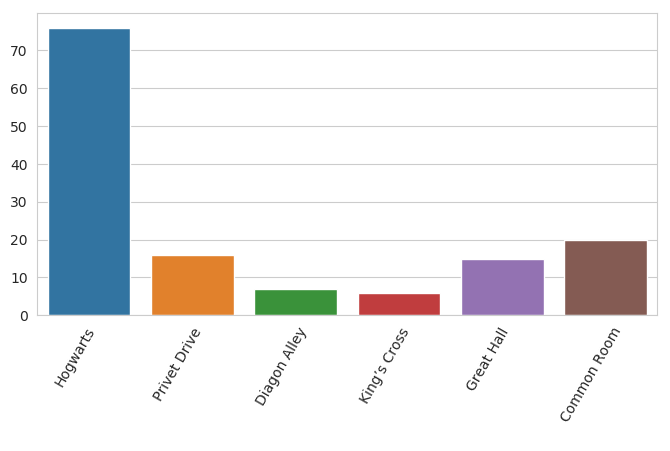

In [56]:
body = ' '.join(HP.body)
loc = ["Hogwarts", "Privet", "Diagon Alley", "King’s Cross", "Great Hall", "(c|C)ommon (r|R)oom"]
xticks = ["Hogwarts\n\n", "Privet Drive\n\n", "Diagon Alley\n\n", "King’s Cross\n\n", "Great Hall\n\n", "Common Room\n\n"]
loc_count = [len(re.findall(l, body)) for l in loc]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=xticks, y=loc_count)
plt.xticks(rotation=60)

### Spell count

Text(0, 0.5, 'Count')

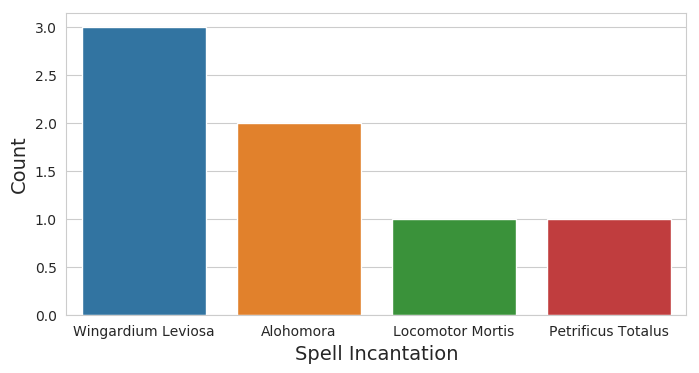

In [57]:
body = ' '.join(HP.body)
spells = ["Wingardium Leviosa", "Alohomora", "Locomotor Mortis", "Petrificus Totalus"]
spell_count = [len(re.findall(s, body)) for s in spells]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=spells, y=spell_count)
ax.set_xlabel("Spell Incantation", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

### Subject mention count 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

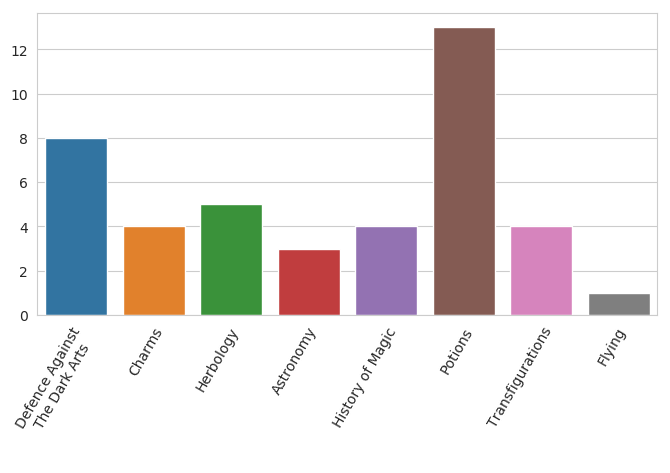

In [58]:
body = ' '.join(HP.body)
sub = ["Dark Arts", "Charms", "Herbology", "Astronomy", "History of Magic", "Potions", "Transfiguration", "Flying"]
xticks = ["Defence Against\nThe Dark Arts\n\n\n", "Charms\n", "Herbology\n\n", "Astronomy\n\n", "History of Magic\n\n\n", "Potions\n", "Transfigurations\n\n\n", "Flying\n"]
sub_count = [len(re.findall(s, body)) for s in sub]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=xticks, y=sub_count)
plt.xticks(rotation=60)

### Zipf's Law

In [60]:
top_words = {
    'the': 0, 'of': 0, 'and': 0, 'to': 0, 'a': 0, 'in': 0, 'is': 0, 'i': 0, 'that': 0, 'it': 0, 'for': 0,
    'you': 0, 'was': 0, 'with': 0, 'on': 0, 'as': 0, 'have': 0, 'but': 0, 'be': 0, 'they': 0
}

In [61]:
body = ' '.join(HP.body)
text = body.lower()

In [62]:
for i in top_words.keys():
    top_words[i] = len(re.findall(' ' + i + ' ', text))

In [63]:
zipf_df = pd.DataFrame.from_dict(top_words, orient='index').reset_index()
zipf_df.columns = ['Word', 'Count']

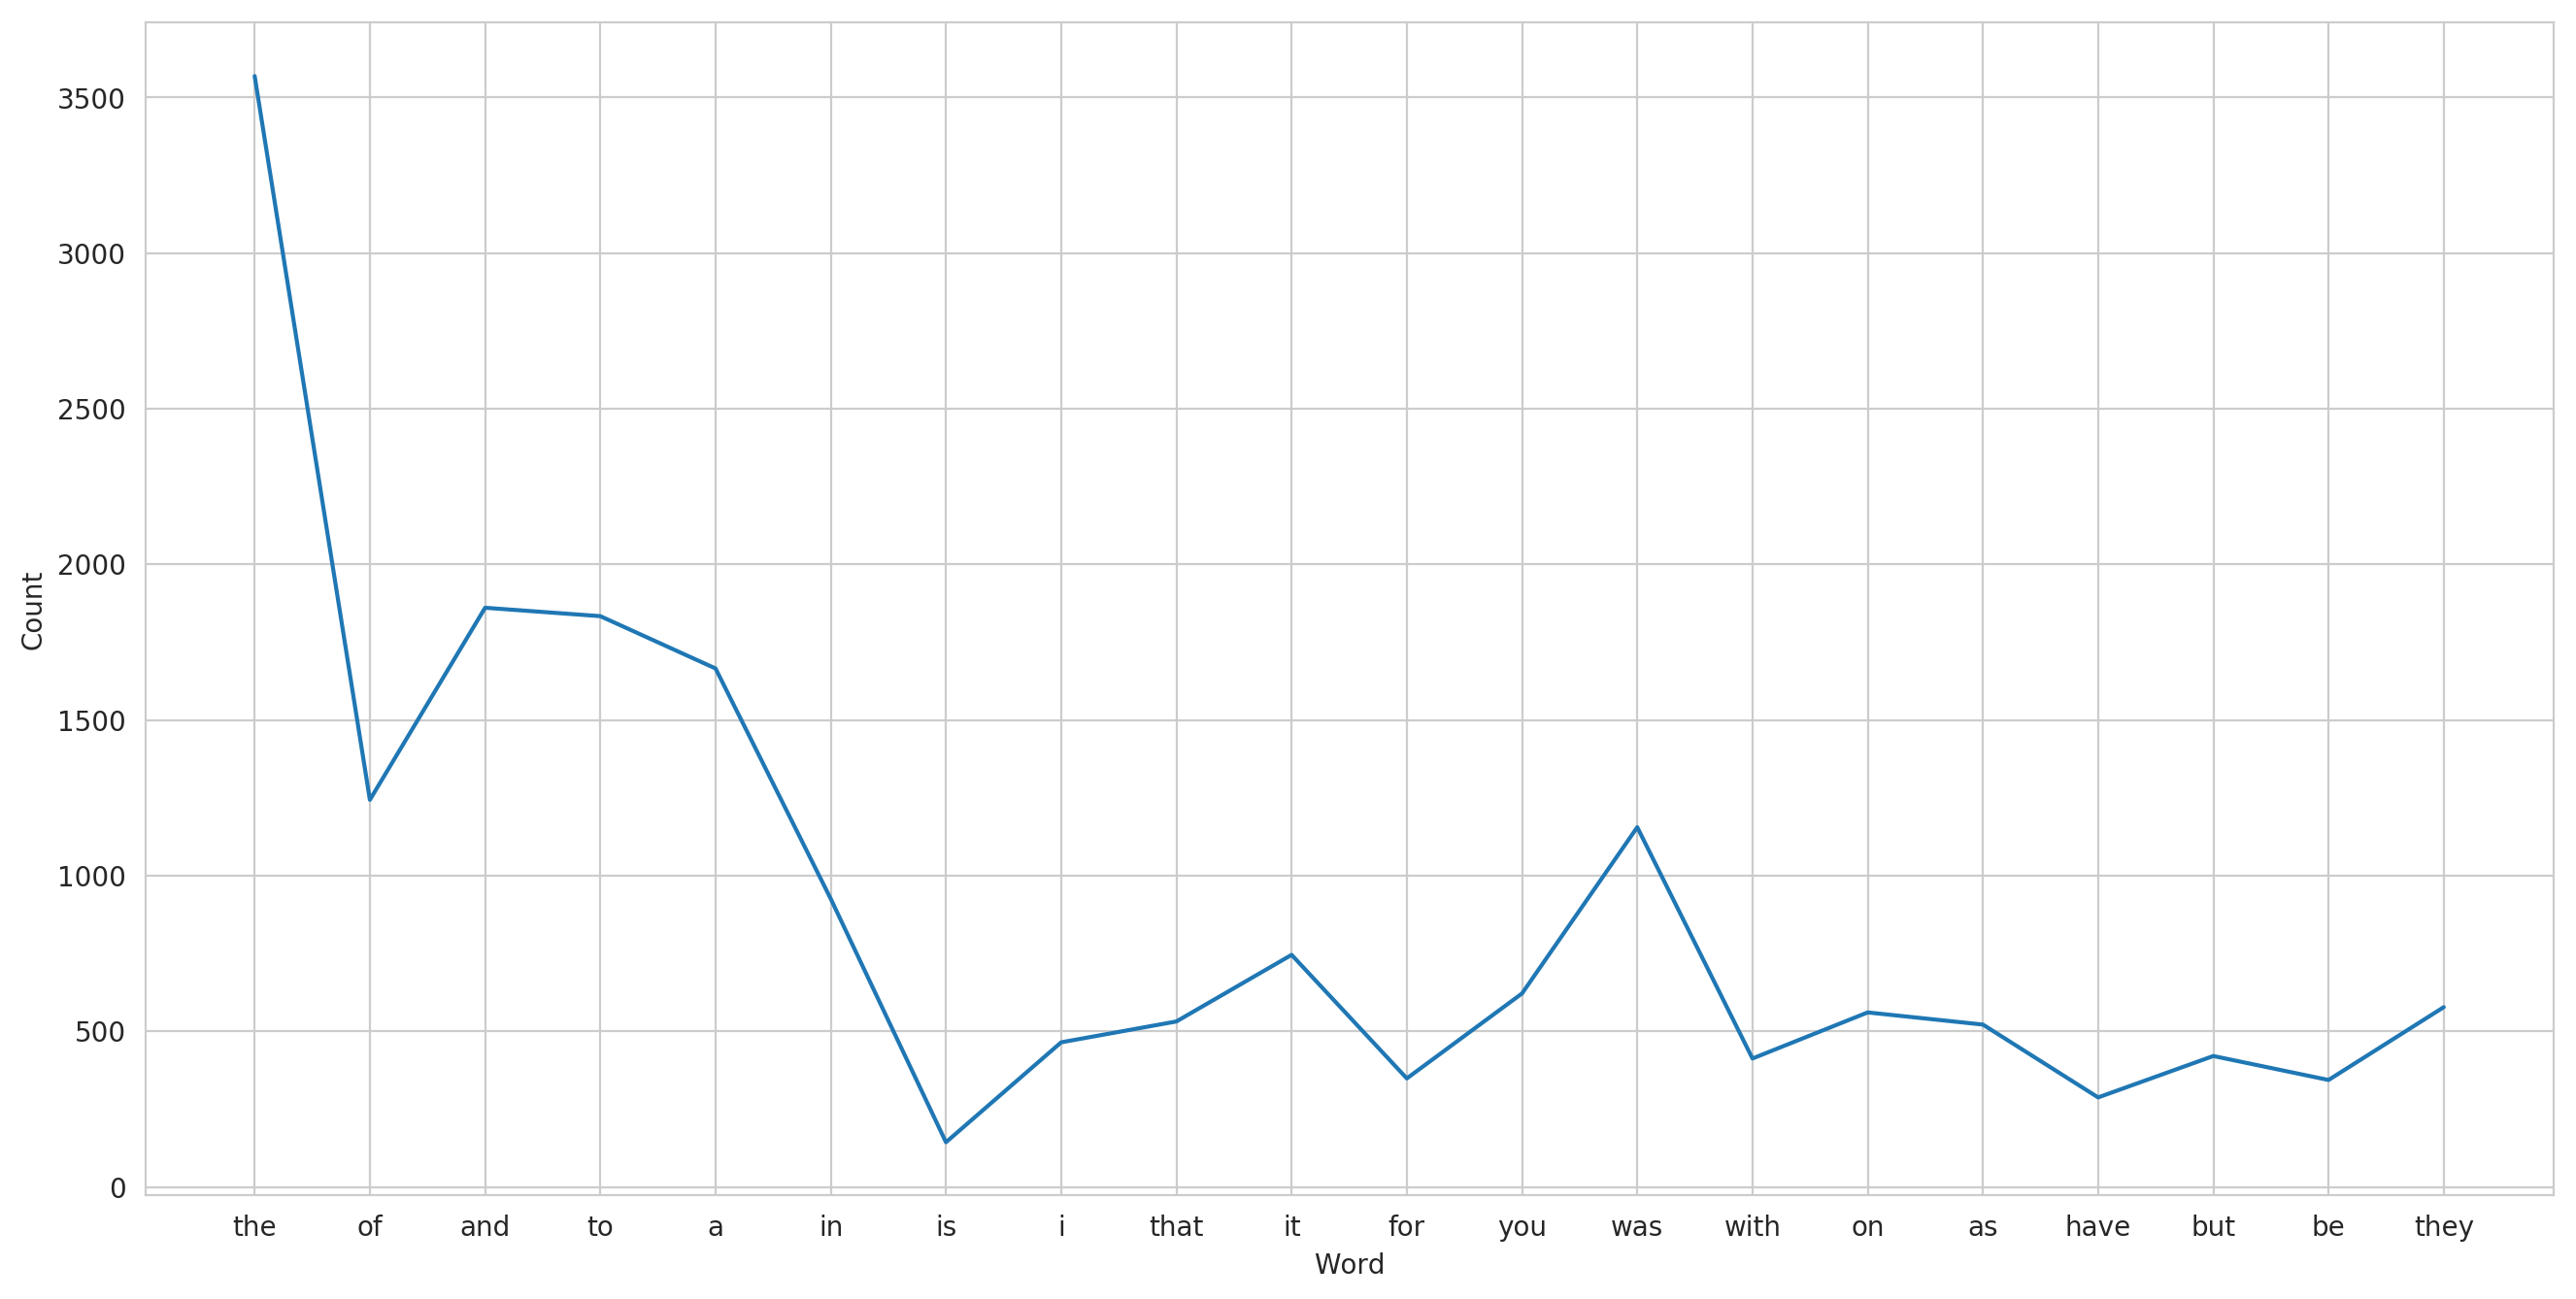

In [64]:
ax = plt.subplots(figsize=(16,8),dpi=200)
ax = sns.lineplot(data=zipf_df, x='Word', y='Count', sort=False)

### Hero's Journey Breakdown

Status Quo: Chapter 1 (The Boy Who Lived) - Chapter 2 (The Vanishing Glass) <br>
Call to Adventure: Chapter 3 (The Letters From No One) - Chapter 4 (The Keeper Of The Keys) <br>
Assistance: Chapter 5 (Diagon Alley) <br>
Departure: Chapter 6 (The Journey from Platform Nine and Three-Quarters) <br>
Trials: Chapter 7 (The Sorting Hat) - Chapter 15 (The Forbidden Forest) <br>
Approach: Chapter 16 (Through the Trapdoor) <br>
Crisis: Chapter 17 (The Man With Two Faces)[0:81] <br>
Treasure: Chapter 17 (The Man With Two Faces)[81:102] <br>
Result: Chapter 17 (The Man With Two Faces)[102:203] <br>
Return: Chapter 17 (The Man With Two Faces)[203:213] <br>
New Life: Chapter 17 (The Man With Two Faces)[213:228] <br>
Resolution: Chapter 17 (The Man With Two Faces)[229] <br>

In [56]:
heros_journey_sc = {
    'Status Quo': 0, 'Call to Adventure': 0, 'Assistance': 0, 'Departure': 0, 'Trials': 0, 
    'Approach': 0, 'Crisis': 0, 'Treasure': 0, 'Result': 0, 'Return': 0, 'New Life': 0, 'Resolution': 0
}

In [57]:
num_ch = HP.num_chapters
for i in range(1, num_ch+1):
    text = HP.get(i, 'b')
    if i == 1 or i == 2:
        heros_journey_sc['Status Quo'] += len(text)
    elif i == 3 or i == 4:
        heros_journey_sc['Call to Adventure'] += len(text)
    elif i == 5:
        heros_journey_sc['Assistance'] += len(text)
    elif i == 6:
        heros_journey_sc['Departure'] += len(text)
    elif i in range(7, 16):
        heros_journey_sc['Trials'] += len(text)
    elif i == 16:
        heros_journey_sc['Approach'] += len(text)
    elif i == 17:
        heros_journey_sc['Crisis'] += len(text[0:81])
        heros_journey_sc['Treasure'] += len(text[81:102])
        heros_journey_sc['Result'] += len(text[102:203])
        heros_journey_sc['Return'] += len(text[203:213])
        heros_journey_sc['New Life'] += len(text[213:228])
        heros_journey_sc['Resolution'] += len([text[228]])

In [58]:
heros_journey_sc

{'Status Quo': 210,
 'Call to Adventure': 286,
 'Assistance': 292,
 'Departure': 287,
 'Trials': 1448,
 'Approach': 320,
 'Crisis': 81,
 'Treasure': 21,
 'Result': 101,
 'Return': 10,
 'New Life': 15,
 'Resolution': 1}

In [59]:
hero_df = pd.DataFrame.from_dict(heros_journey_sc, orient='index').reset_index()
hero_df.columns = ['Stage', 'Count']

In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
compound = []
num_ch = HP.num_chapters
for i in range(1, num_ch+1):
    sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
    sentence_list = HP.get(i, 'b')
    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        sentiments['compound'] += vs['compound']
        compound.append(vs['compound'])
        sentiments['neg'] += vs['neg']
        sentiments['neu'] += vs['neu']
        sentiments['pos'] += vs['pos']
        
    print(HP.get(i, 't'), ': ', sentiments['compound'] / len(sentence_list))
    sentiments['compound'] = sentiments['compound'] / len(sentence_list)
    
    sentiments['neg'] = sentiments['neg'] / len(sentence_list)
    sentiments['neu'] = sentiments['neu'] / len(sentence_list)
    sentiments['pos'] = sentiments['pos'] / len(sentence_list)

The Boy Who Lived :  0.13042090909090912
The Vanishing Glass :  -0.025489
The Letters From No One :  0.003945864661654132
The Keeper Of The Keys :  -0.008934640522875813
Diagon Alley :  0.08248287671232876
The Journey from Platform Nine and Three-Quarters :  0.04768954703832753
The Sorting Hat :  0.09343957219251343
The Potions Master :  0.07009565217391303
The Midnight Duel :  -0.005237914691943127
Halloween :  0.03358353658536588
Quidditch :  -0.02669854014598541
The Mirror Of Erised :  0.0801019417475728
Nicholas Flamel :  0.02437983870967741
Norbert the Norwegian Ridgeback :  0.021236690647482025
The Forbidden Forest :  -0.10576170212765948
Through the Trapdoor :  0.014536562500000006
The Man With Two Faces :  0.03728908296943231


In [63]:
def sumRange(L,a,b):                                                                                                                                                                                                
    sum = 0                                                                                                                                                                                                         
    for i in range(a,b,1):                                                                                                                                                                                        
        sum += L[i]                                                                                                                                                                                                  
    return sum

indicies, bins = ([] for i in range(2))
num_parts = 64
parts = int(len(compound)/num_parts)
for i in range(0,num_parts):
    indicies.append((i*parts + (i+1)*parts)/2)
    bins.append(sumRange(compound, i*parts, (i+1)*parts)/(3072/num_parts))
    

In [65]:
stage_pos = [0]
for num in hero_df['Count']:
    stage_pos.append(stage_pos[-1]+num)
        
print(stage_pos)

[0, 210, 496, 788, 1075, 2523, 2843, 2924, 2945, 3046, 3056, 3071, 3072]


In [128]:
list(range(len(stage_pos)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [127]:
hero_df.loc[hero_df['Stage'] != 'Treasure', 'Stage'][9]

'Return'

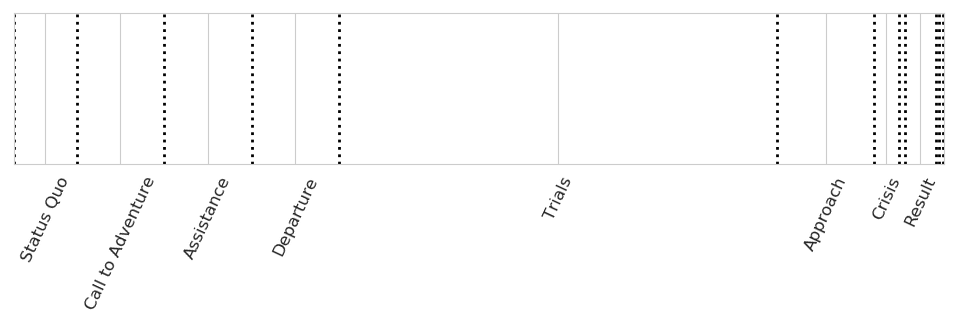

In [134]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(12,2),dpi=100)
ax = sns.lineplot(x=[], y=[])
ax.set_xlim(0, stage_pos[-1])
ax.set(yticks=[])
ax.xaxis.set_label_position('top') 


for i in range(len(stage_pos)):
    plt.axvline(x=stage_pos[i], color='black', linewidth=2, linestyle=':')
    

_ = plt.xticks([(stage_pos[i-1] + stage_pos[i])/2 for i in range(1, len(stage_pos) - 3) if i != 8], hero_df.loc[hero_df['Stage'] != 'Treasure', 'Stage'], rotation=65,
           fontsize=12)

### Parts-of-speech Tagging

In [149]:
pos_dict = {"Nouns": [], "Adjectives": [], "Verbs": []}
body = HP.body
for sent in body:
    tagged = nltk.pos_tag(nltk.word_tokenize(sent))
    pos_dict['Nouns'].append(len([tup[0] for tup in tagged if (tup[0] not in ['Mr.', 'Mrs.']) and re.findall("^NNP.*", tup[1])]))
    pos_dict['Adjectives'].append(len([tup[0] for tup in tagged if re.findall("^J.*", tup[1])]))
    pos_dict['Verbs'].append(len([tup[0] for tup in tagged if re.findall("^VB.*", tup[1])]))


Nouns:  [3, 5, 12, 5, 0, 5, 10, 6, 3, 1, 1, 1, 2, 10, 0, 7, 1, 2, 0, 1, 2, 9, 4, 7, 3, 3, 1, 0, 3, 1, 0, 5, 1, 2, 2, 1, 4, 1, 8, 0, 3, 1, 4, 3, 5, 3, 0, 0, 1, 2, 0, 2, 6, 1, 4, 2, 1, 0, 1, 3, 6, 3, 2, 0, 2, 3, 4, 8, 2, 2, 0, 13, 1, 3, 1, 6, 2, 1, 5, 1, 7, 5, 4, 2, 1, 2, 3, 0, 0, 2, 5, 0, 2, 4, 2, 1, 3, 4, 4, 3, 2, 5, 14, 1, 7, 1, 5, 3, 1, 9, 8, 4, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 4, 11, 10, 0, 3, 3, 0, 4, 10, 3, 0, 5, 4, 2, 1, 2, 1, 2, 4, 9, 6, 10, 9, 3, 3, 3, 0, 3, 3, 2, 0, 2, 2, 0, 2, 5, 2, 11, 10, 3, 1, 3, 2, 7, 10, 12, 5, 7, 0, 1, 8, 2, 1, 1, 8, 10, 1, 6, 1, 3, 3, 1, 4, 2, 0, 1, 4, 0, 1, 0, 1, 1, 3, 0, 2, 16, 1, 4, 2, 3, 0, 0, 13, 6, 2, 3, 9, 7, 5, 11, 15, 2, 3, 12, 1, 10, 1, 1, 2, 0, 1, 0, 7, 3, 8, 0, 3, 2, 1, 2, 1, 9, 1, 2, 2, 2, 0, 0, 0, 2, 3, 3, 2, 4, 4, 3, 1, 2, 0, 5, 0, 4, 0, 1, 2, 2, 0, 1, 8, 3, 2, 1, 4, 1, 0, 3, 3, 3, 2, 1, 2, 4, 1, 2, 19, 1, 1, 6, 12, 14, 2, 1, 2, 2, 0, 1, 12, 2, 3, 2, 1, 5, 2, 4, 8, 2, 1, 3, 0, 2, 0, 8, 3, 2, 5, 1, 1, 6, 0, 3, 0, 2, 0, 2, 0, 3, 2, 1, 7, 7, 2

In [164]:
def sumRange(L,a,b):                                                                                                                                                                                                
    sum = 0                                                                                                                                                                                                         
    for i in range(a,b,1):                                                                                                                                                                                        
        sum += L[i]                                                                                                                                                                                                  
    return sum

indicies, n_bins, a_bins, v_bins = ([] for i in range(4))
num_parts = 64
parts = int(len(pos_df['Nouns'])/num_parts)
for i in range(0,num_parts):
    indicies.append((i*parts + (i+1)*parts)/2)
    n_bins.append(sumRange(pos_df['Nouns'], i*parts, (i+1)*parts)/(3072/num_parts))
    a_bins.append(sumRange(pos_df['Adjectives'], i*parts, (i+1)*parts)/(3072/num_parts))
    v_bins.append(sumRange(pos_df['Verbs'], i*parts, (i+1)*parts)/(3072/num_parts))
    
pos_dict['Nouns'] = n_bins
pos_dict['Adjectives'] = a_bins
pos_dict['Verbs'] = v_bins
    

In [165]:
pos_df = pd.DataFrame.from_dict(pos_dict)
pos_df.set_index(pos_df['x_ticks'], inplace=True)

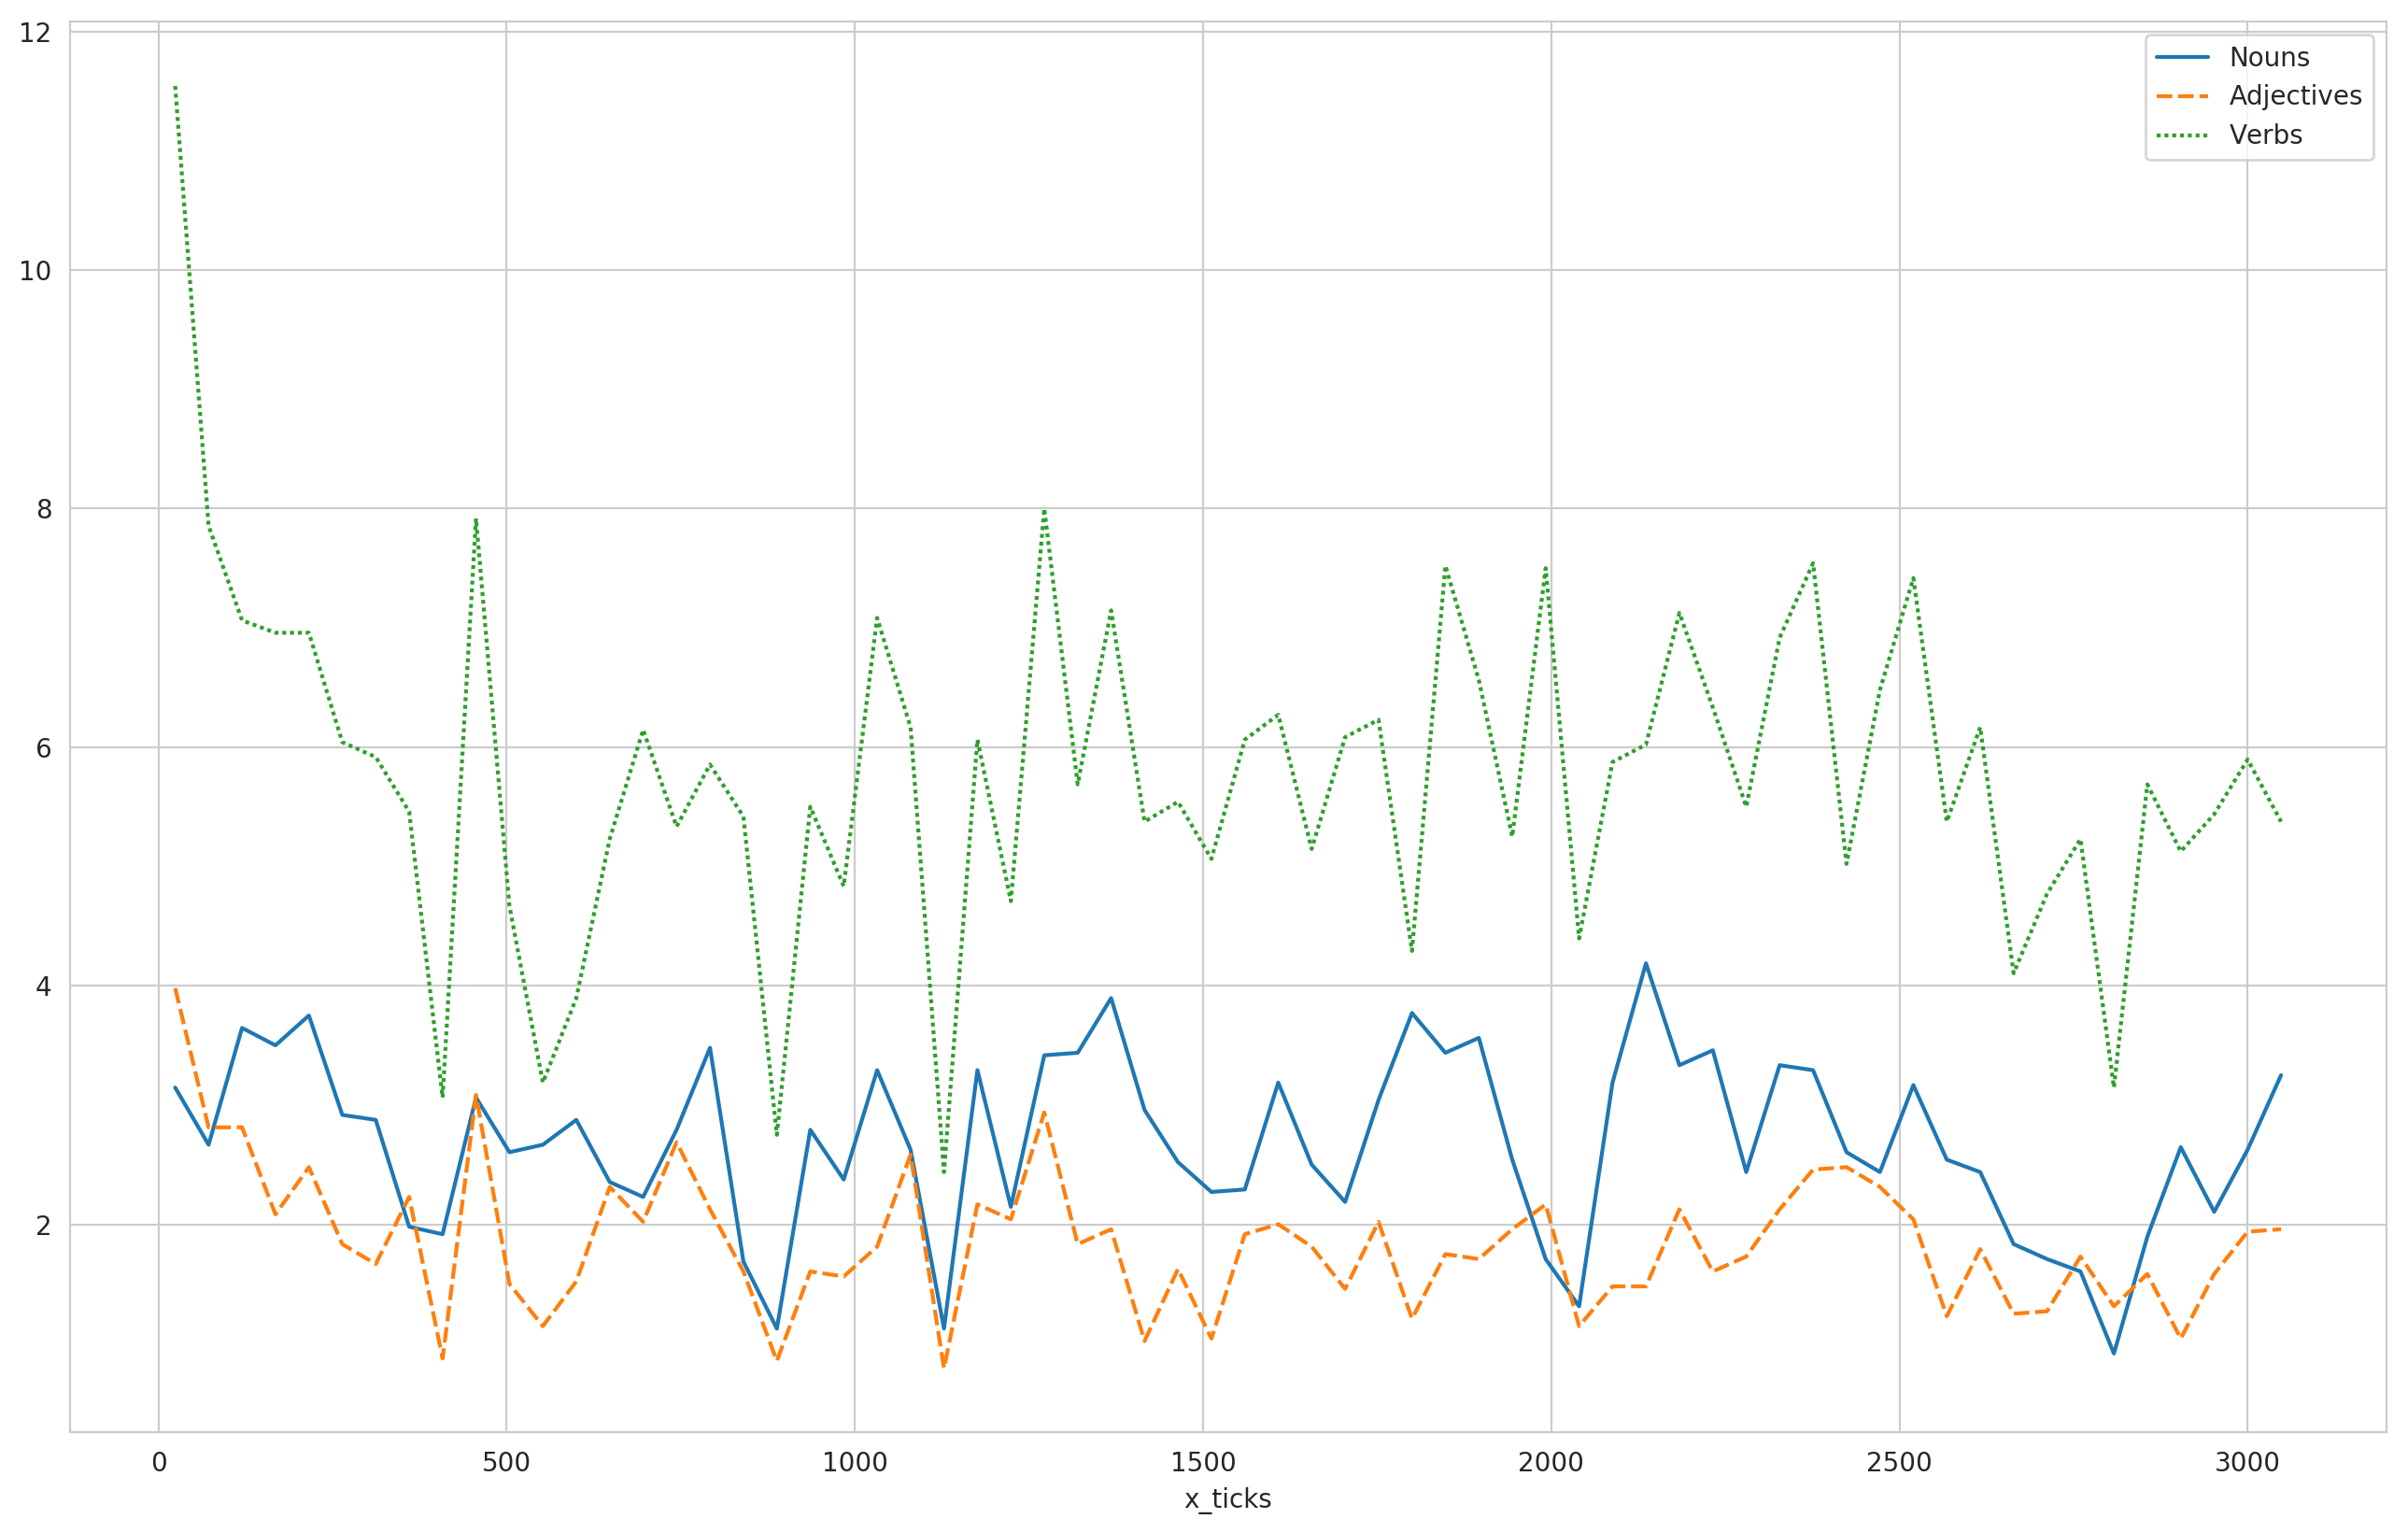

In [182]:
ax = plt.subplots(figsize=(16,10),dpi=200)
ax = sns.lineplot(data=pos_df)

### Sentiment Analysis

In [137]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
compound = []
num_ch = HP.num_chapters
for i in range(1, num_ch+1):
    sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
    sentence_list = HP.get(i, 'b')
    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        sentiments['compound'] += vs['compound']
        compound.append(vs['compound'])
        sentiments['neg'] += vs['neg']
        sentiments['neu'] += vs['neu']
        sentiments['pos'] += vs['pos']
        
    print(HP.get(i, 't'), ': ', sentiments['compound'] / len(sentence_list))
    sentiments['compound'] = sentiments['compound'] / len(sentence_list)
    
    sentiments['neg'] = sentiments['neg'] / len(sentence_list)
    sentiments['neu'] = sentiments['neu'] / len(sentence_list)
    sentiments['pos'] = sentiments['pos'] / len(sentence_list)

The Boy Who Lived :  0.13042090909090912
The Vanishing Glass :  -0.025489
The Letters From No One :  0.003945864661654132
The Keeper Of The Keys :  -0.008934640522875813
Diagon Alley :  0.08248287671232876
The Journey from Platform Nine and Three-Quarters :  0.04768954703832753
The Sorting Hat :  0.09343957219251343
The Potions Master :  0.07009565217391303
The Midnight Duel :  -0.005237914691943127
Halloween :  0.03358353658536588
Quidditch :  -0.02669854014598541
The Mirror Of Erised :  0.0801019417475728
Nicholas Flamel :  0.02437983870967741
Norbert the Norwegian Ridgeback :  0.021236690647482025
The Forbidden Forest :  -0.10576170212765948
Through the Trapdoor :  0.014536562500000006
The Man With Two Faces :  0.03728908296943231


In [138]:
#sum(map(lambda x:x,compound[64:128]))

In [139]:
def sumRange(L,a,b):                                                                                                                                                                                                
    sum = 0                                                                                                                                                                                                         
    for i in range(a,b,1):                                                                                                                                                                                        
        sum += L[i]                                                                                                                                                                                                  
    return sum

indicies, bins = ([] for i in range(2))
num_parts = 64
parts = int(len(compound)/num_parts)
for i in range(0,num_parts):
    indicies.append((i*parts + (i+1)*parts)/2)
    bins.append(sumRange(compound, i*parts, (i+1)*parts)/(3072/num_parts))
    

In [140]:
body = [HP.get(i, 'b') for i in range(1, HP.num_chapters+1)]
ch_pos = [0]
for ch_body in body:
    ch_pos.append(ch_pos[-1]+len(ch_body))
        
print(ch_pos)

[0, 110, 210, 343, 496, 788, 1075, 1262, 1354, 1565, 1729, 1866, 2072, 2196, 2335, 2523, 2843, 3072]


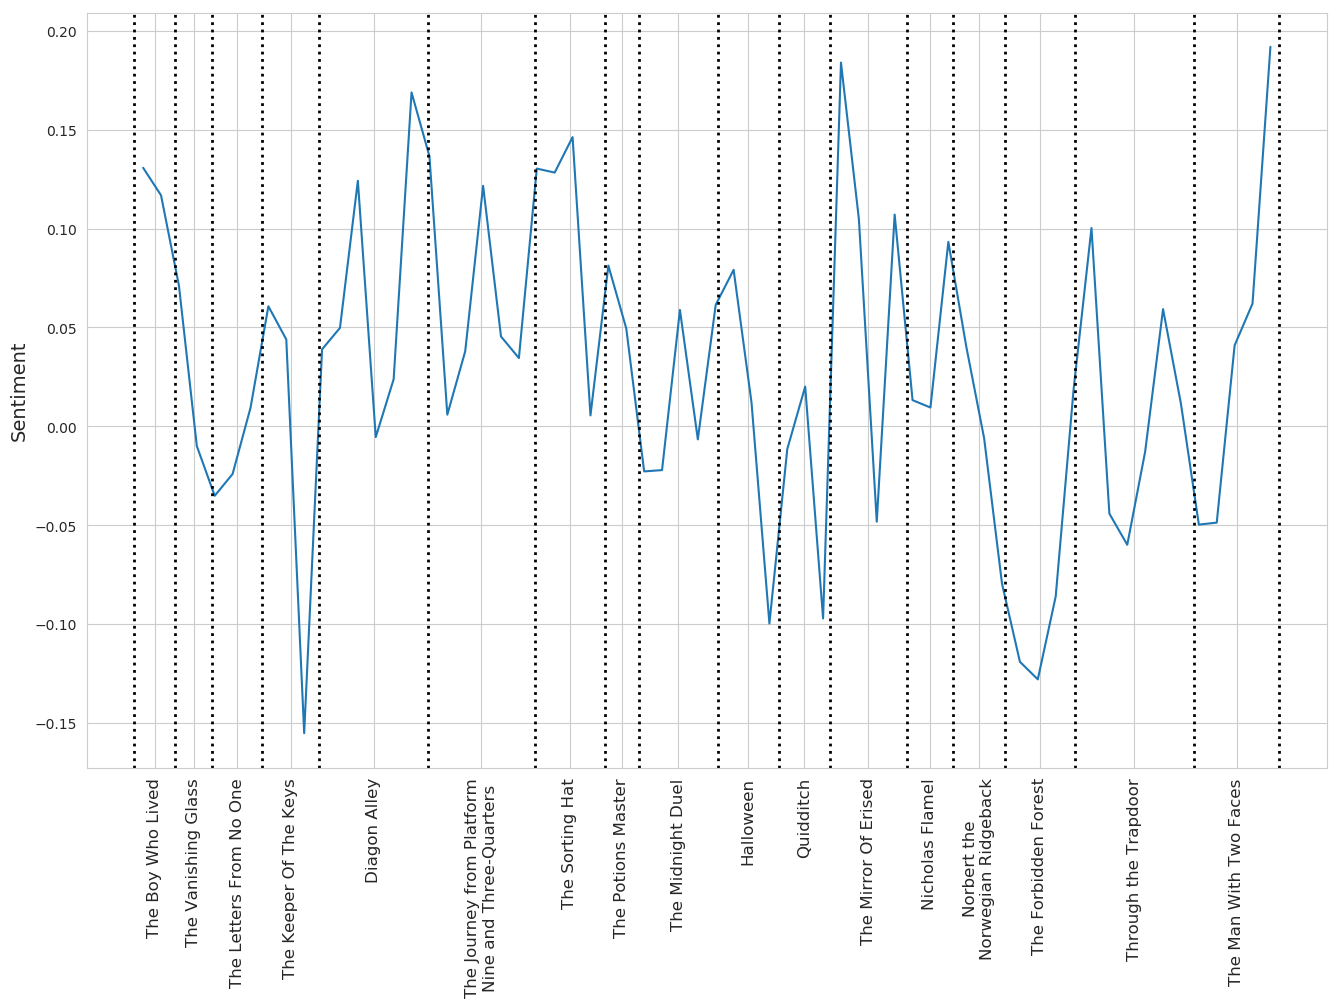

In [144]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(16,10),dpi=100)
ax = sns.lineplot(x=indicies, y=bins)
ax.set_ylabel("Sentiment", fontsize=14)


for ch in ch_pos:
    plt.axvline(x=ch, color='black', linewidth=2, linestyle=':')
    
x_labels = ['The Boy Who Lived','The Vanishing Glass','The Letters From No One','The Keeper Of The Keys',
 'Diagon Alley','The Journey from Platform\nNine and Three-Quarters','The Sorting Hat','The Potions Master',
 'The Midnight Duel','Halloween','Quidditch','The Mirror Of Erised','Nicholas Flamel',
 'Norbert the\nNorwegian Ridgeback','The Forbidden Forest','Through the Trapdoor','The Man With Two Faces']
    
_ = plt.xticks([(ch_pos[i-1] + ch_pos[i])/2 for i in range(1, len(ch_pos))], x_labels, rotation=90,
           fontsize=12)

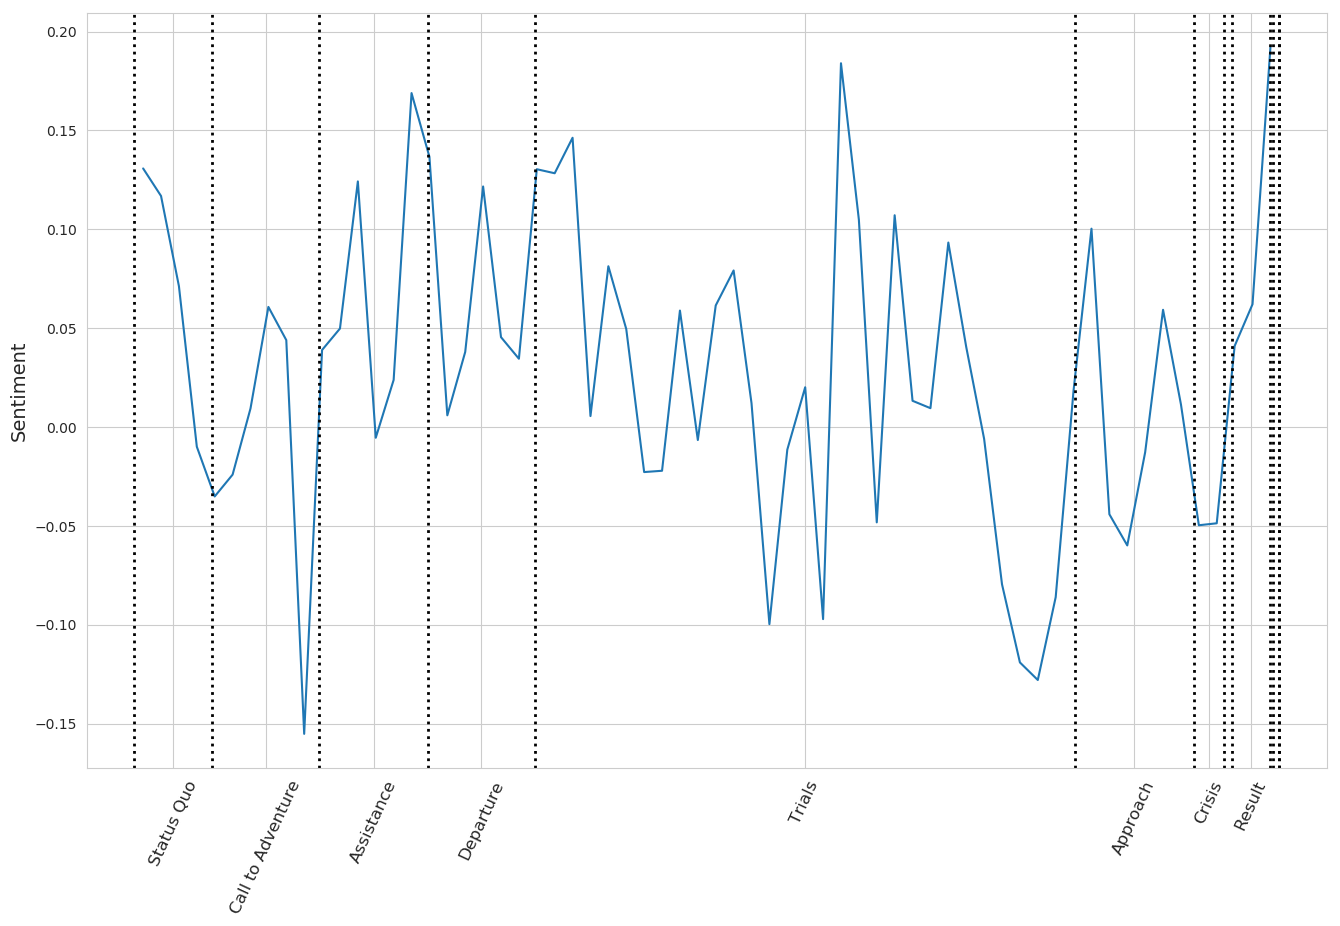

In [135]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(16,10),dpi=100)
ax = sns.lineplot(x=indicies, y=bins)
ax.set_ylabel("Sentiment", fontsize=14)


for i in range(len(stage_pos)):
    plt.axvline(x=stage_pos[i], color='black', linewidth=2, linestyle=':')
    

_ = plt.xticks([(stage_pos[i-1] + stage_pos[i])/2 for i in range(1, len(stage_pos) - 3) if i != 8], hero_df.loc[hero_df['Stage'] != 'Treasure', 'Stage'], rotation=65,
           fontsize=12)